# Week 4 HW - Analysis of Methylation
____________________________________

## Load packages

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind as ttest
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Load data

Start by loading the methylation score data seperately for E4.0 and E5.5.

In [2]:
E4_0 = pd.read_csv('mapped/mapped926.tsv', sep='\t', header=None)
E4_0

,0,1,2,3,4,5,6
0,chr6,50108240,50110240,Mpp6,0,+,0
1,chr6,50261769,50263769,Dfna5,0,-,0
2,chr6,50382837,50384837,Osbpl3,0,-,0
3,chr6,50566474,50568474,Cycs,0,-,133.3333333
4,chr6,50570397,50572397,Mir6371,0,+,700
...,...,...,...,...,...,...,...
102,chr6,58831699,58833699,Herc3,0,+,0
103,chr6,58907126,58909126,Nap1l5,0,-,866.6666667
104,chr6,59024502,59026502,Fam13a,0,-,0
105,chr6,59206869,59208869,Tigd2,0,+,100


In [3]:
E5_5 = pd.read_csv('mapped/mapped929.tsv', sep='\t', header=None)
E5_5

,0,1,2,3,4,5,6
0,chr6,50108240,50110240,Mpp6,0,+,100.000000
1,chr6,50261769,50263769,Dfna5,0,-,950.000000
2,chr6,50382837,50384837,Osbpl3,0,-,1650.000000
3,chr6,50566474,50568474,Cycs,0,-,650.000000
4,chr6,50570397,50572397,Mir6371,0,+,1916.666667
...,...,...,...,...,...,...,...
102,chr6,58831699,58833699,Herc3,0,+,850.000000
103,chr6,58907126,58909126,Nap1l5,0,-,800.000000
104,chr6,59024502,59026502,Fam13a,0,-,750.000000
105,chr6,59206869,59208869,Tigd2,0,+,950.000000


Then pare down to just the methylation counts and whether it's for a hox gene or not. This is all the information we need for our analysis.

In [4]:
df = pd.DataFrame()
df['E4'] = E4_0[6]
df['E5'] = E5_5[6]

# I am censoring entries in which there was no methylation call
# for one of the cell types
df = df[(df['E4'] != '.') & (df['E5'] != '.') & (df['E4'])]
df = df.astype(float)

df['Hox?'] = E4_0[3].str.startswith('Hox')

df

,E4,E5,Hox?
0,0.000000,100.000000,False
1,0.000000,950.000000,False
2,0.000000,1650.000000,False
3,133.333333,650.000000,False
4,700.000000,1916.666667,False
...,...,...,...
102,0.000000,850.000000,False
103,866.666667,800.000000,False
104,0.000000,750.000000,False
105,100.000000,950.000000,False


## Histograms

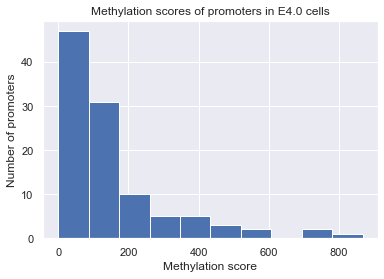

In [5]:
# E4.0 histogram
fig, ax = plt.subplots()
ax.hist(df['E4'])
ax.set_title('Methylation scores of promoters in E4.0 cells')
ax.set_xlabel('Methylation score')
ax.set_ylabel('Number of promoters')
plt.show()

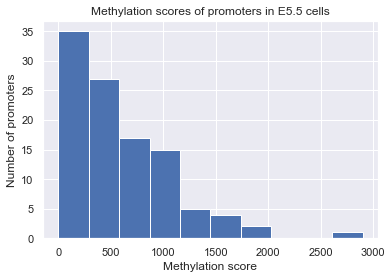

In [6]:
# E5.5 histogram
fig, ax = plt.subplots()
ax.hist(df['E5'])
ax.set_title('Methylation scores of promoters in E5.5 cells')
ax.set_xlabel('Methylation score')
ax.set_ylabel('Number of promoters')
plt.show()

## Scatterplot

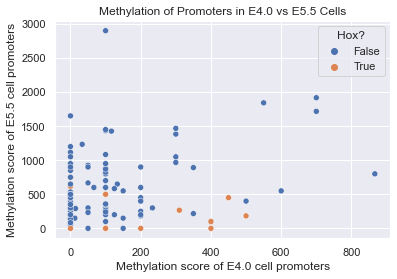

In [7]:
sns.scatterplot(x='E4', y='E5', data=df, hue='Hox?')
# 'hue' parameter colors points from Hox genes differently

plt.title('Methylation of Promoters in E4.0 vs E5.5 Cells')
plt.xlabel('Methylation score of E4.0 cell promoters')
plt.ylabel('Methylation score of E5.5 cell promoters')

plt.show()

## Statistical tests

In [8]:
# Create two DataFrames, one with just Hox genes and one with
# all genes except Hox genes
df_hox = df[df['Hox?']]
df_other = df[~df['Hox?']]
print(df_hox)
print(df_other)

       E4          E5  Hox?
15  100.0    0.000000  True
16    0.0    0.000000  True
17  100.0    0.000000  True
18    0.0  750.000000  True
19  450.0  450.000000  True
20  100.0  283.333333  True
21  100.0  500.000000  True
22  500.0  183.333333  True
24  310.0  266.666667  True
25  400.0    0.000000  True
27    0.0  616.666667  True
28  200.0    0.000000  True
29    0.0  100.000000  True
31  400.0  100.000000  True
             E4           E5   Hox?
0      0.000000   100.000000  False
1      0.000000   950.000000  False
2      0.000000  1650.000000  False
3    133.333333   650.000000  False
4    700.000000  1916.666667  False
..          ...          ...    ...
102    0.000000   850.000000  False
103  866.666667   800.000000  False
104    0.000000   750.000000  False
105  100.000000   950.000000  False
106    0.000000   900.000000  False

[92 rows x 3 columns]


In [9]:
# E4.0 t-test
ttest(df_hox['E4'], df_other['E4'])

Ttest_indResult(statistic=1.2808387127416196, pvalue=0.20309927470974873)

In [10]:
# E5.5 t-test
ttest(df_hox['E5'], df_other['E5'])

Ttest_indResult(statistic=-2.904151606045875, pvalue=0.004498179617860368)

### Takeaway from t-tests:

E4.0 p-value: 0.203099
E5.5 p-value: 0.004498

These tests indicate there is a significance difference between the methylation of Hox genes vs other genes in E5.5 cells but not in E4.0 cells.